# Online Retail Dataset Analysis: Understanding Sales Trends and Customer Behavior
1. Objective
    Analyze e-commerce transaction data to uncover sales trends, customer behavior, and product performance for strategic business insights.
2. Data Type
    Online retail transactions including invoices, products, prices, quantities, customer IDs, countries, and timestamps.
3. Methods Used
    Data cleaning, exploratory analysis, time-series trends, RFM customer segmentation, and visualizations using Pandas, NumPy, Matplotlib, and Seaborn.
4. Key Findings or Insights
    * Peak sales periods were observed around holiday seasons and year-end

   * Top 10 products contributed significantly to total revenue

    * A small segment of customers drove the majority of purchases, validated through RFM segmentation

    * Certain countries like the UK and Netherlands consistently outperformed others in sales volume

    * Weekdays and working hours showed higher transactional activity, suggesting timing-based marketing opportunities
5. Target Audience
    * E-commerce business stakeholders seeking to understand customer behavior and optimize operations
     * Marketing and sales teams interested in product performance and seasonal trends


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from libmambapy.bindings import Transaction

## 1. Data loading and Inspection


In [4]:
import pandas as pd
df = pd.read_csv("data/OnlineRetail.csv", encoding="ISO-8859-1")


* Overview of Dataset

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 2. Data Cleaning and Preparation
* dropping nulls, rmoving canceled orders , total price calculation

In [9]:
df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


* Converting InvoiceDate to datetimem


In [10]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

* Handling missing Customeerids

In [11]:
df["CustomerID"]=df["CustomerID"].fillna(0).astype(int)

* Creating a new column for TotalPrice

In [12]:
df['TotalPrice']=df['Quantity']*df['UnitPrice']

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


* Filtering out Refunds/returns

In [14]:
df=df[df['Quantity']>0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## 3. Descriptive Statistics

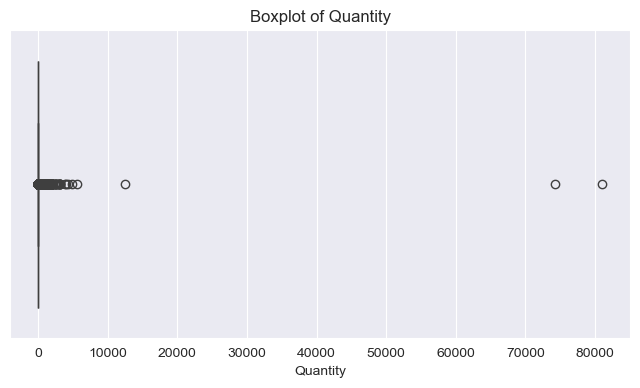

In [15]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x="Quantity")
plt.title('Boxplot of Quantity')
plt.show()

* Histogram for UnitPrice

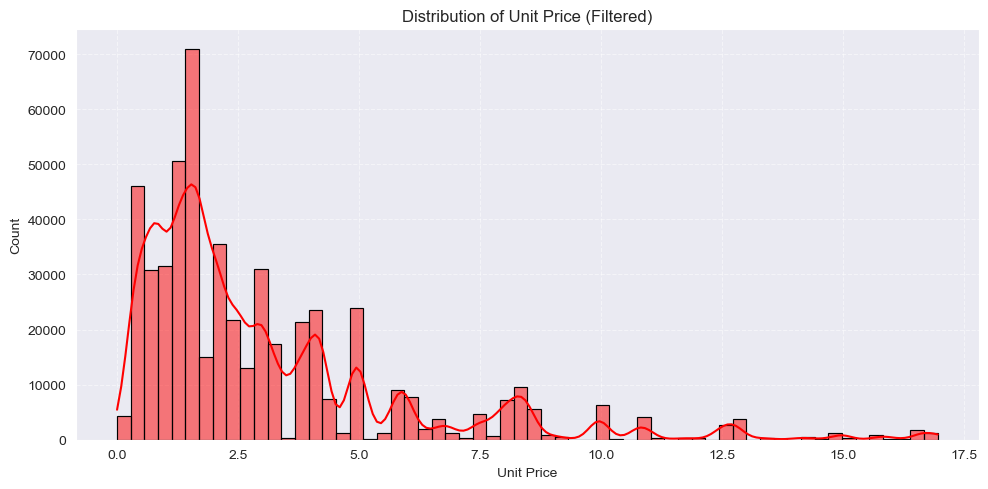

In [16]:
filtered_df = df[(df['UnitPrice'] > 0) & (df['UnitPrice'] < df['UnitPrice'].quantile(0.99))]

plt.figure(figsize=(10, 5))
sns.histplot(filtered_df['UnitPrice'], bins=60, kde=True, color='red', edgecolor='black')
plt.title('Distribution of Unit Price (Filtered)')
plt.xlabel('Unit Price')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

* Histogram for TotalPrice

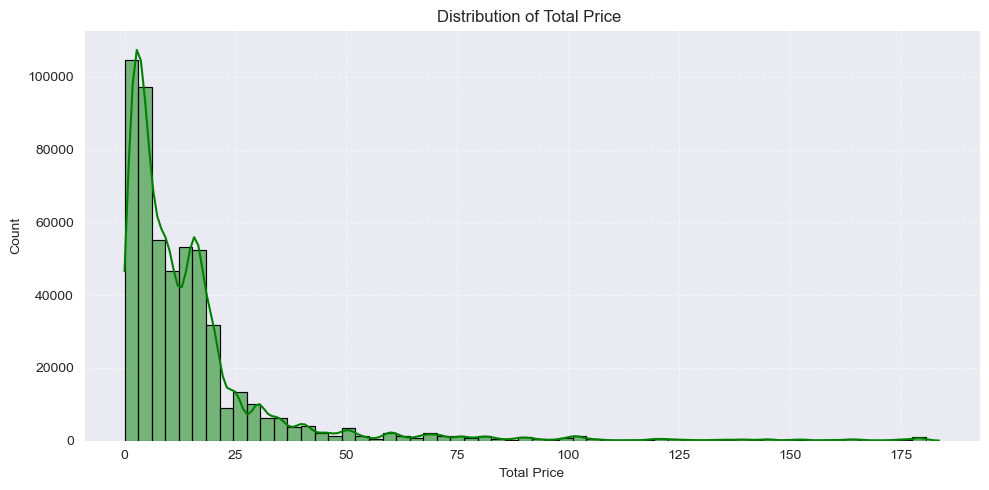

In [17]:


# Filter: remove zero/negative and top 1% extreme values
filtered_total = df[(df['TotalPrice'] > 0) & (df['TotalPrice'] < df['TotalPrice'].quantile(0.99))]

plt.figure(figsize=(10, 5))
sns.histplot(data=filtered_total,x="TotalPrice", bins=60, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Total Price ')
plt.xlabel('Total Price')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [18]:
print(df[['Quantity', 'UnitPrice','TotalPrice']].describe())

            Quantity      UnitPrice    TotalPrice
count  531285.000000  531285.000000  531285.00000
mean       10.655262       3.857296      20.03550
std       156.830323      41.810047     270.91237
min         1.000000  -11062.060000  -11062.06000
25%         1.000000       1.250000       3.75000
50%         3.000000       2.080000       9.90000
75%        10.000000       4.130000      17.70000
max     80995.000000   13541.330000  168469.60000


## 4. Transaction Trend Analysis

* Daily revenue Trend

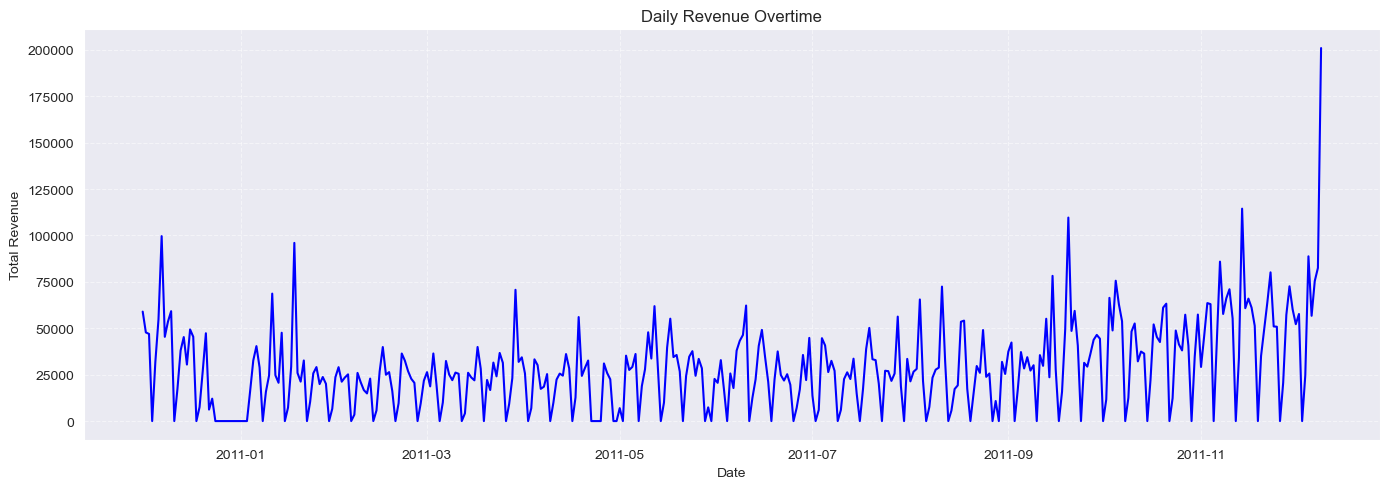

In [19]:
df_clean=df[(df['TotalPrice'] > 0) & (df['Quantity'] > 0)]
df_clean.set_index('InvoiceDate', inplace=True)
daily_revenue=df_clean['TotalPrice'].resample('D').sum()
plt.figure(figsize=(14,5))
sns.lineplot(data=daily_revenue,color="blue")
plt.title('Daily Revenue Overtime')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True,linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

* Daily Sales Volume Trendm


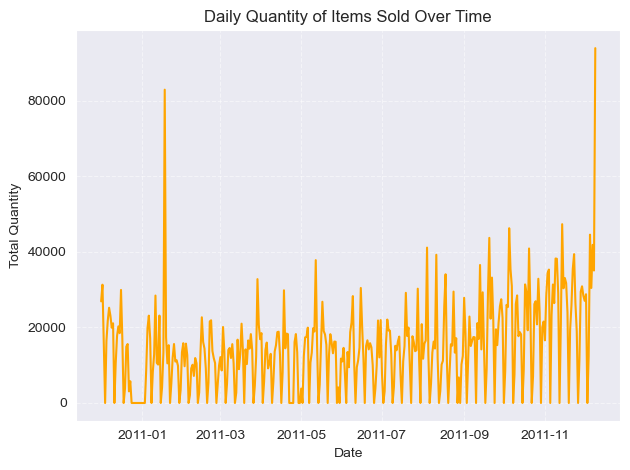

In [20]:
daily_quantity=df_clean['Quantity'].resample('D').sum()
sns.lineplot(data=daily_quantity,color="orange")
plt.title('Daily Quantity of Items Sold Over Time')
plt.ylabel('Total Quantity')
plt.xlabel('Date')
plt.grid(True,linestyle='--',alpha=.5)
plt.tight_layout()
plt.show()


## Top Selling Products

* Top 10 Products by Quantity Sold

C:\Users\hp\AppData\Local\Temp\ipykernel_181944\3002338478.py:4: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_quantity,x="Quantity",y="Description",hue="Description",palette=["blue","green"],legend=False)


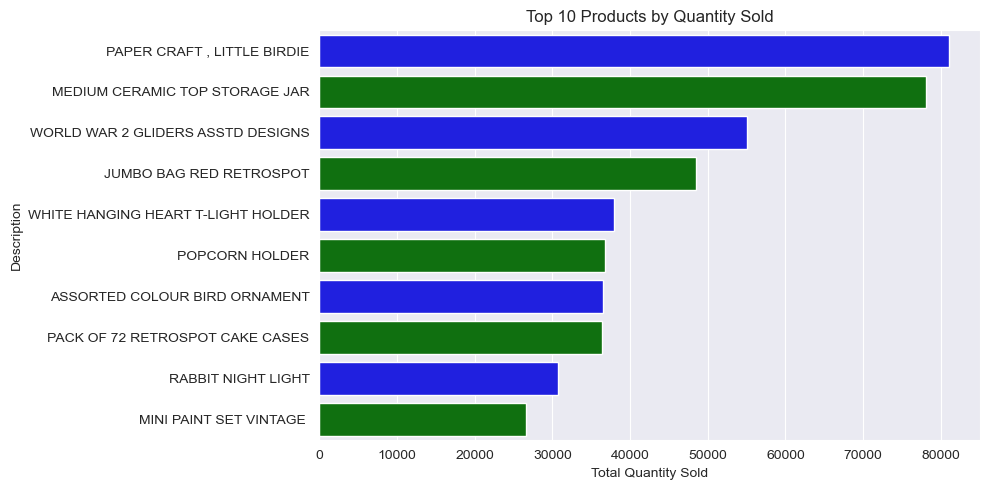

In [35]:
df_valid=df[(df['Quantity']>0) & (df['TotalPrice']>0)]
top_quantity=df_valid.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=top_quantity,x="Quantity",y="Description",hue="Description",palette=["blue","green"],legend=False)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Description')
plt.tight_layout()
plt.show()



* Top 10 Products by Revenue(Total Price)

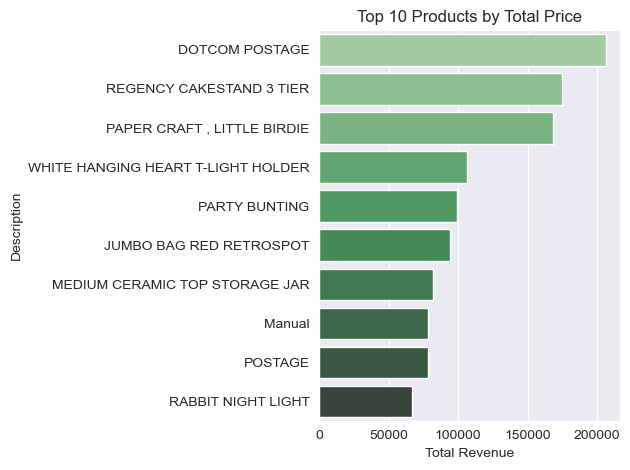

In [36]:
top_revenue=(df_valid.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index())
sns.barplot(data=top_revenue,x="TotalPrice",y="Description",palette="Greens_d",hue="Description",legend=False)
plt.title('Top 10 Products by Total Price')
plt.xlabel('Total Revenue')
plt.ylabel('Description')
plt.tight_layout()
plt.show()

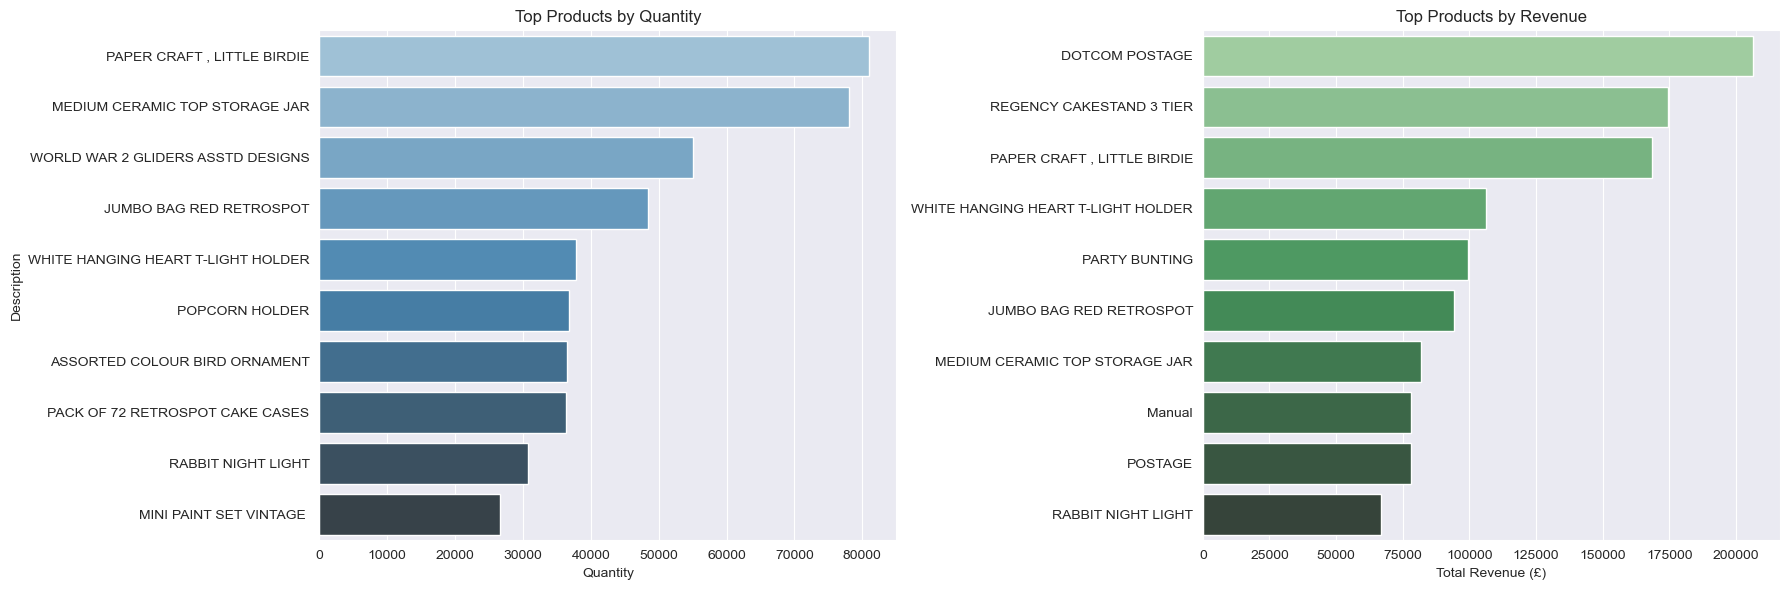

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Left: Quantity
sns.barplot(x='Quantity', y='Description', data=top_quantity, ax=axes[0], palette='Blues_d',hue='Description', legend=False)
axes[0].set_title('Top Products by Quantity')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Description')

# Right: Revenue
sns.barplot(x='TotalPrice', y='Description', data=top_revenue, ax=axes[1], palette='Greens_d',hue='Description', legend=False)
axes[1].set_title('Top Products by Revenue')
axes[1].set_xlabel('Total Revenue (£)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


In [24]:
## 6. Country wise Sales Analysis

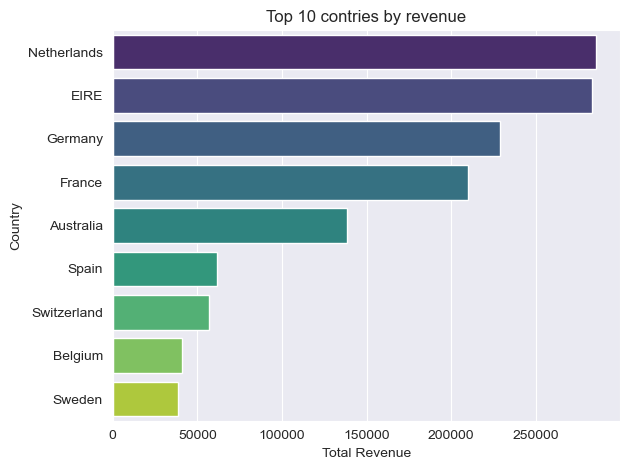

In [39]:
country_sales=df_valid.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()
top_countries=country_sales[country_sales['Country']!='United Kingdom'].head(10)
sns.barplot(data=top_countries,x="TotalPrice",y="Country",palette="viridis",hue='Country',legend=False)
plt.title('Top 10 Countries by revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()

plt.show()

* Pie chart of Revenue Share

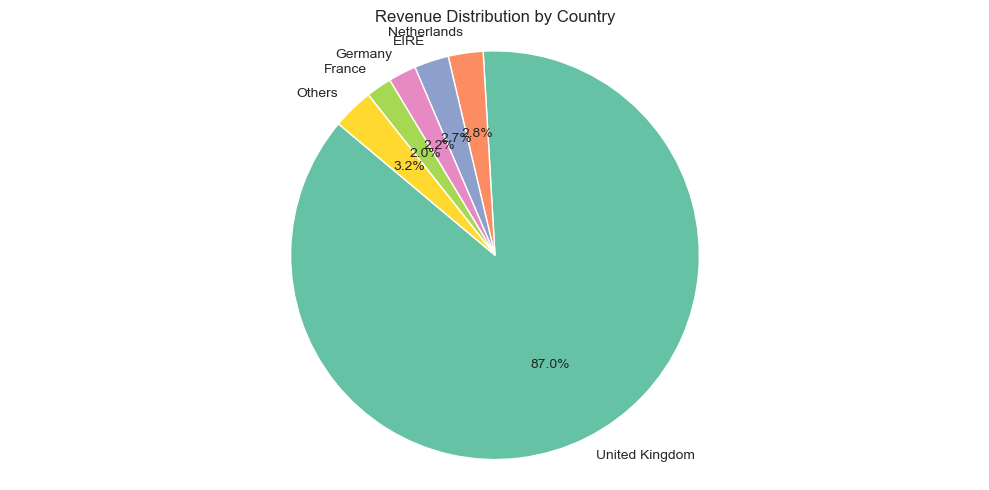

In [26]:
top=country_sales.head(5)
others=country_sales['TotalPrice'][5:].sum()
labels=list(top['Country'])+['Others']
sizes=list(top['TotalPrice'])+[others]
plt.figure(figsize=(10,5))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=140,colors=sns.color_palette('Set2'))
plt.title('Revenue Distribution by Country')
plt.axis('equal')
plt.tight_layout()
plt.show()

* Piechart of Revenue Share (excluding UK )

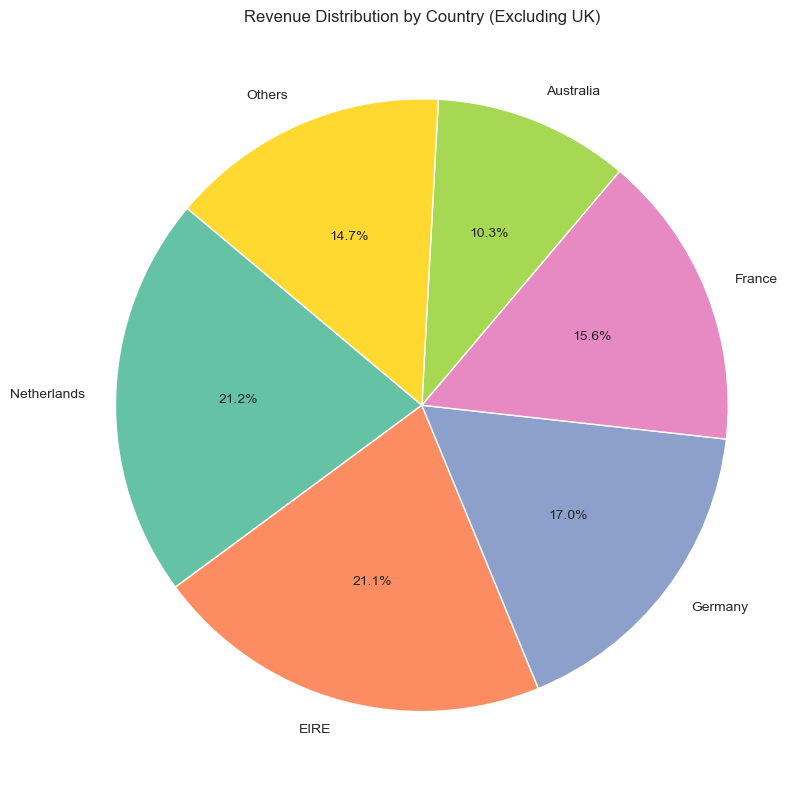

In [27]:

non_uk_sales = country_sales[country_sales['Country'] != 'United Kingdom'] # filtering Uk out of bound


top5_non_uk = non_uk_sales.head(5)


others_sum = non_uk_sales['TotalPrice'][5:].sum()


labels = list(top5_non_uk['Country']) + ['Others']
sizes = list(top5_non_uk['TotalPrice']) + [others_sum]


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Revenue Distribution by Country (Excluding UK)')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [28]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


## 7. Customer-Level Behavior Analysis
Group transactions by CustomerID to analyze:

Frequency: How often they purchase

Monetary: How much they spend in total

Average Spend: Revenue per order



In [29]:
df_valid2=df[(df['CustomerID'].notnull())& (df['Quantity']>0) & (df['TotalPrice']>0)] # filtering  of invalid rows
customer_data=df_valid2.groupby('CustomerID').agg({
    'InvoiceNo':'nunique', # purchase freq
    'TotalPrice':['sum','mean'] # total and mean spending
})
customer_data.columns=['Frequency','Monetary','AvgSpend']
customer_data=customer_data.reset_index()


* Avg Spend per Customer

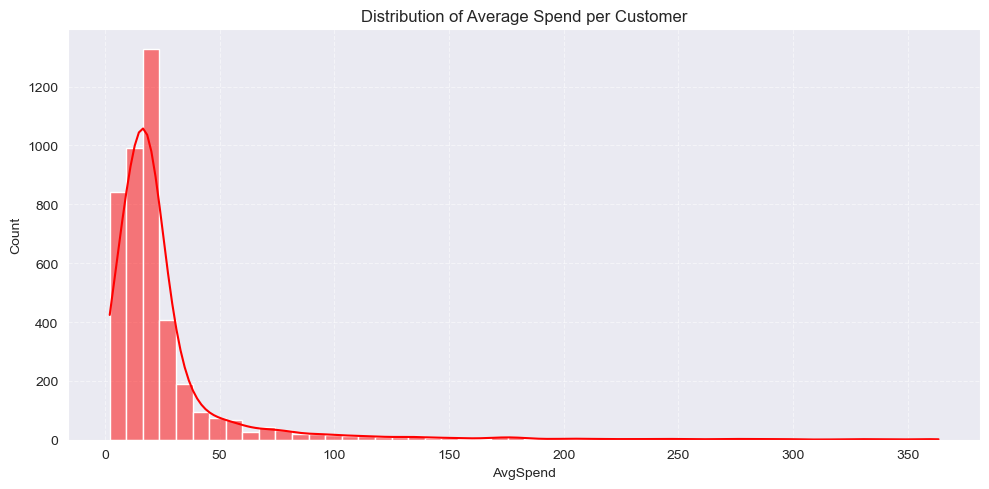

In [30]:
cutoff=customer_data['AvgSpend'].quantile(0.99)
customer_dataori=customer_data[customer_data['AvgSpend']<=cutoff]
plt.figure(figsize=(10,5))
sns.histplot(data=customer_dataori,x="AvgSpend",bins=50,kde=True,color="red")
plt.title('Distribution of Average Spend per Customer')
plt.xlabel('AvgSpend')
plt.grid(True,linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

* Scatter Plot- Frequency vs Monetary

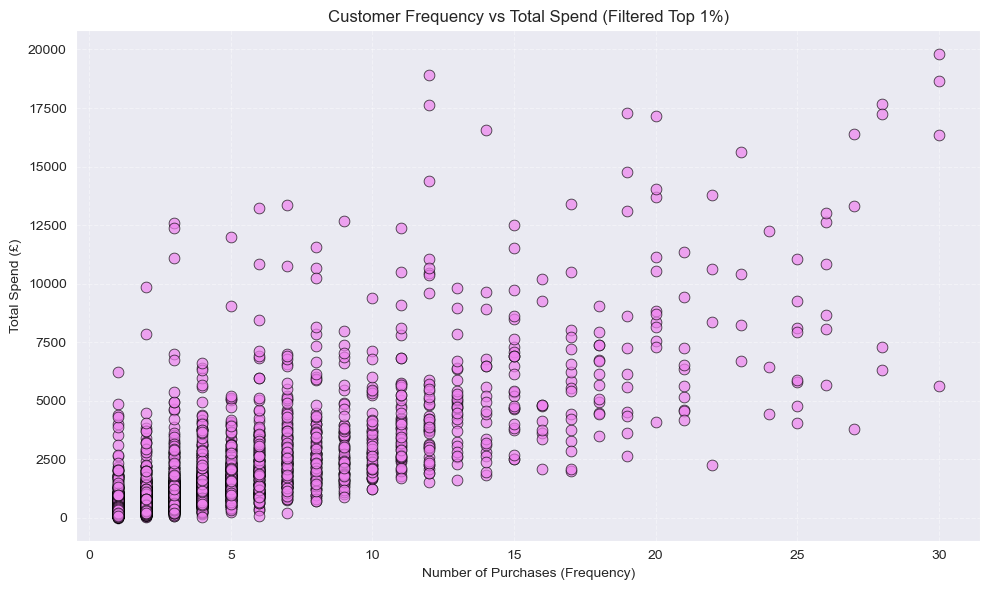

In [31]:

freq_cutoff = customer_data['Frequency'].quantile(0.99)
money_cutoff = customer_data['Monetary'].quantile(0.99)


filtered_data = customer_data[
    (customer_data['Frequency'] <= freq_cutoff) &
    (customer_data['Monetary'] <= money_cutoff)
]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_data,x='Frequency',y='Monetary',alpha=0.7,
color='violet',s=60,edgecolor='black'
)
plt.title("Customer Frequency vs Total Spend (Filtered Top 1%)")
plt.xlabel("Number of Purchases (Frequency)")
plt.ylabel("Total Spend (£)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## 8. RFM Analysis
Recency – How recently a customer purchased (lower is better)

Frequency – How often they purchase

Monetary – How much they spend

* RFM Table

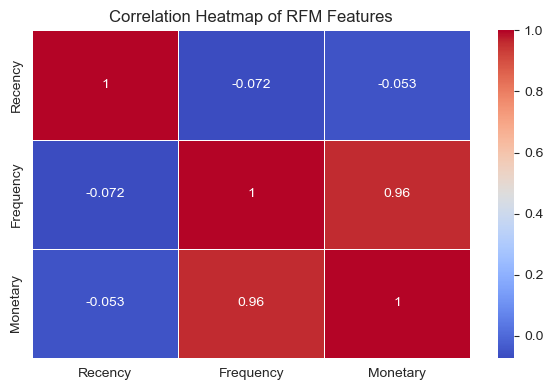

In [32]:
# Step 1: Reference date
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Step 2: RFM Table
rfm = df[df['CustomerID'].notnull()].groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Step 3: Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of RFM Features')
plt.tight_layout()
plt.show()


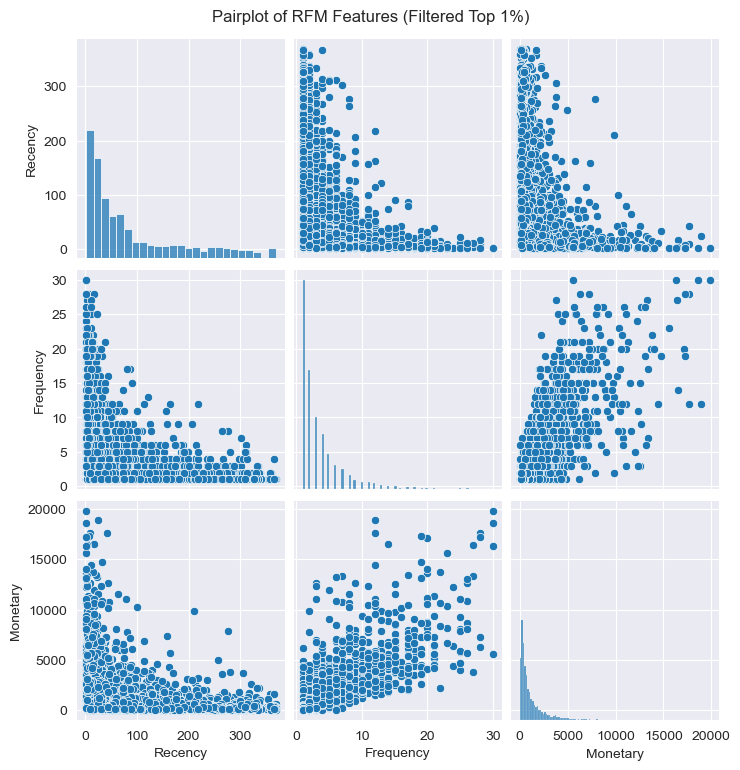

In [33]:


# Filter out top 1% outliers in each RFM feature
recency_cutoff = rfm['Recency'].quantile(0.99)
frequency_cutoff = rfm['Frequency'].quantile(0.99)
monetary_cutoff = rfm['Monetary'].quantile(0.99)

rfm_filtered = rfm[
    (rfm['Recency'] <= recency_cutoff) &
    (rfm['Frequency'] <= frequency_cutoff) &
    (rfm['Monetary'] <= monetary_cutoff)
]

# Plot filtered pairplot
sns.pairplot(rfm_filtered[['Recency', 'Frequency', 'Monetary']], height=2.5)
plt.suptitle("Pairplot of RFM Features (Filtered Top 1%)", y=1.02)
plt.show()


* Scatter Plot - Frequency vs Monetary

* BarPlot : counts segment

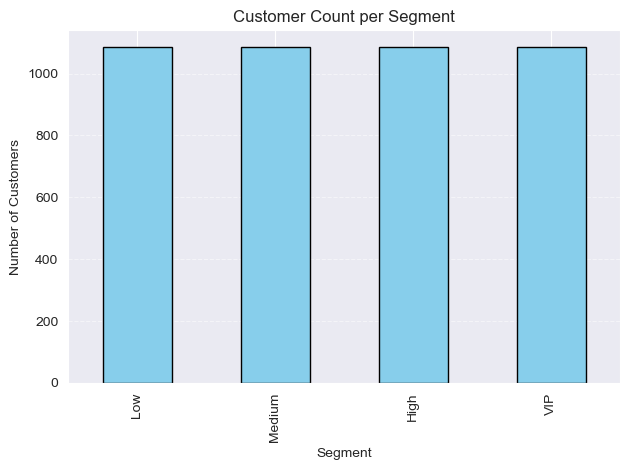

In [48]:
rfm['Segment'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Customer Count per Segment")
plt.ylabel("Number of Customers")
plt.xlabel("Segment")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 9. Hourly and Weekly Purchase Patterns
Analyze when customers place their orders by hour and day of week using InvoiceDate

In [49]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

df_valid3=df[(df['Quantity']>0) & (df['TotalPrice']>0)]

df_valid3['hour']=df_valid3['InvoiceDate'].dt.hour
df_valid3['weekday']=df_valid['InvoiceDate'].dt.dayofweek

C:\Users\hp\AppData\Local\Temp\ipykernel_181944\149947041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
C:\Users\hp\AppData\Local\Temp\ipykernel_181944\149947041.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid3['hour']=df_valid3['InvoiceDate'].dt.hour
C:\Users\hp\AppData\Local\Temp\ipykernel_181944\149947041.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

* Countplot Orders by Hour


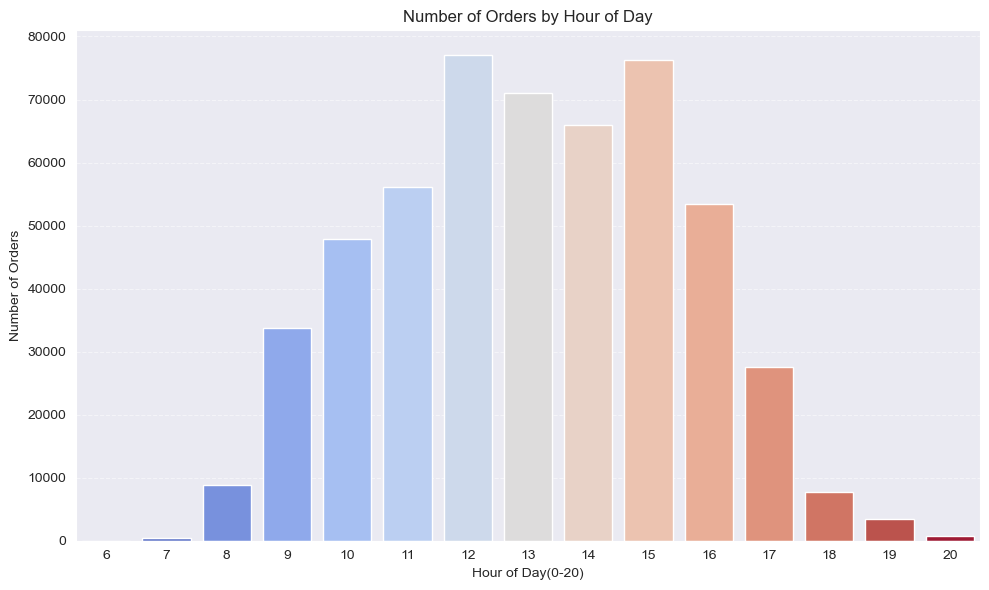

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_valid3,x='hour',palette='coolwarm',hue='hour',legend=False)
plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day(0-20)')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

* Countplot Orders by Weekday m

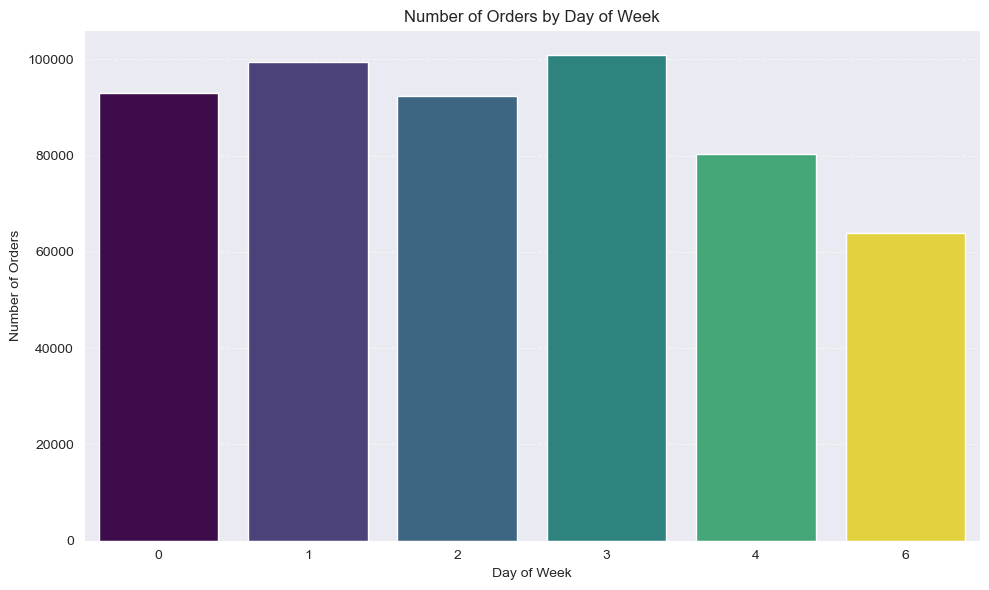

In [52]:
weekday_labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.figure(figsize=(10,6))
sns.countplot(x='weekday',data=df_valid3,palette='viridis',legend=False,hue='weekday')
plt.title('Number of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


* Lineplot Revenue by Hour

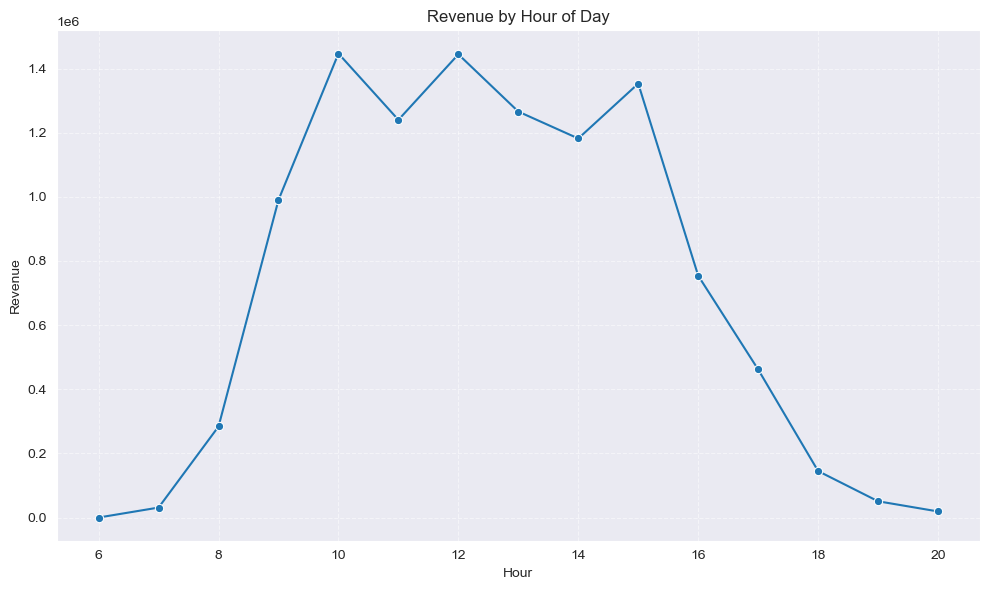

In [61]:
revenue_by_hour=df_valid3.groupby('hour')['TotalPrice'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=revenue_by_hour,x='hour',y='TotalPrice',marker='o')
plt.title('Revenue by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Revenue')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

* Heatmap Revenue by Day of Week and Hour

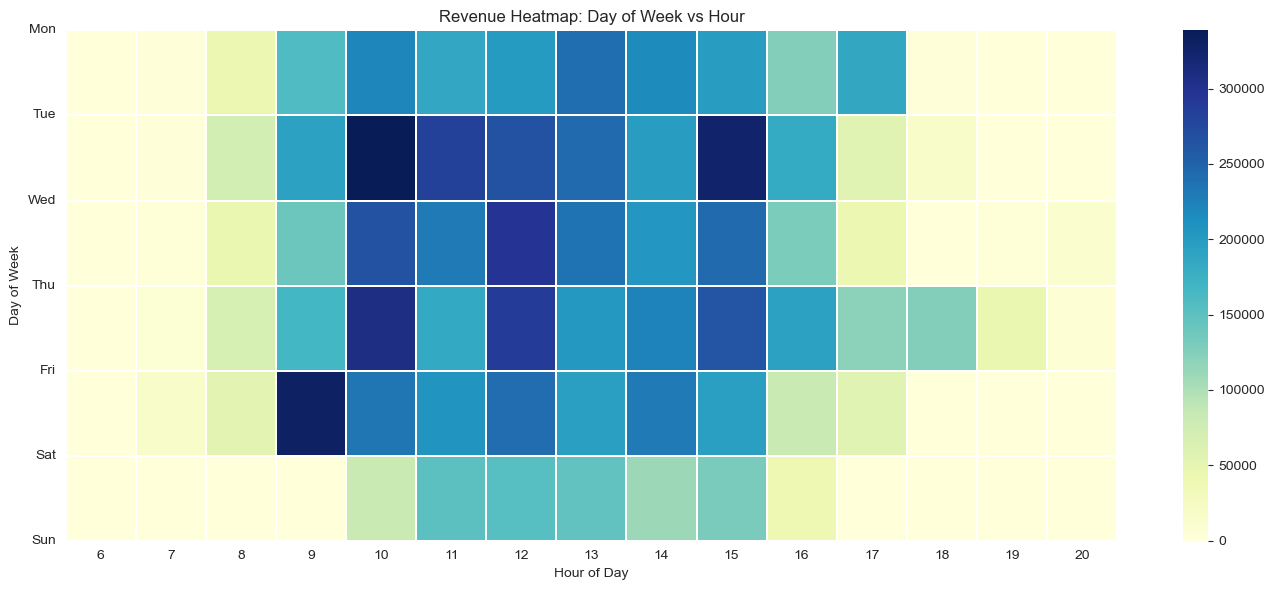

In [63]:

heatmap_data = df_valid3.pivot_table(
    index='weekday', columns='hour', values='TotalPrice', aggfunc='sum'
).fillna(0)

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.3)
plt.title("Revenue Heatmap: Day of Week vs Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.yticks(ticks=range(7), labels=weekday_labels, rotation=0)
plt.tight_layout()
plt.show()


## 10. Return/ Cancellation Analysis
Identify trasaction where InvoiceNo starts with 'C',indication a cancelled/returned order
* Operation used : startswith('C')

* Tagging each row for Returns vs Non Returns

In [55]:
df.loc[:, 'IsReturned'] = df['InvoiceNo'].astype(str).str.startswith('C')


C:\Users\hp\AppData\Local\Temp\ipykernel_181944\1804051971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'IsReturned'] = df['InvoiceNo'].astype(str).str.startswith('C')


* Countplot- Return vs Non Return Transaction

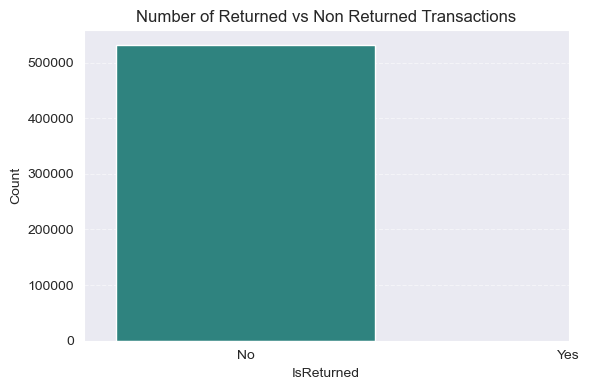

In [56]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x="IsReturned",hue='IsReturned',palette='viridis',legend=False)
plt.title('Number of Returned vs Non Returned Transactions')
plt.xlabel('IsReturned')
plt.ylabel('Count')
plt.xticks(ticks=[0,1],labels=['No','Yes'])
plt.grid(axis='y',linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 11. Product Level Profitability
Calculation of total revenue per product and visualize the top performing items bassed on TotalPrice
Visulaisation type: Barplot Des


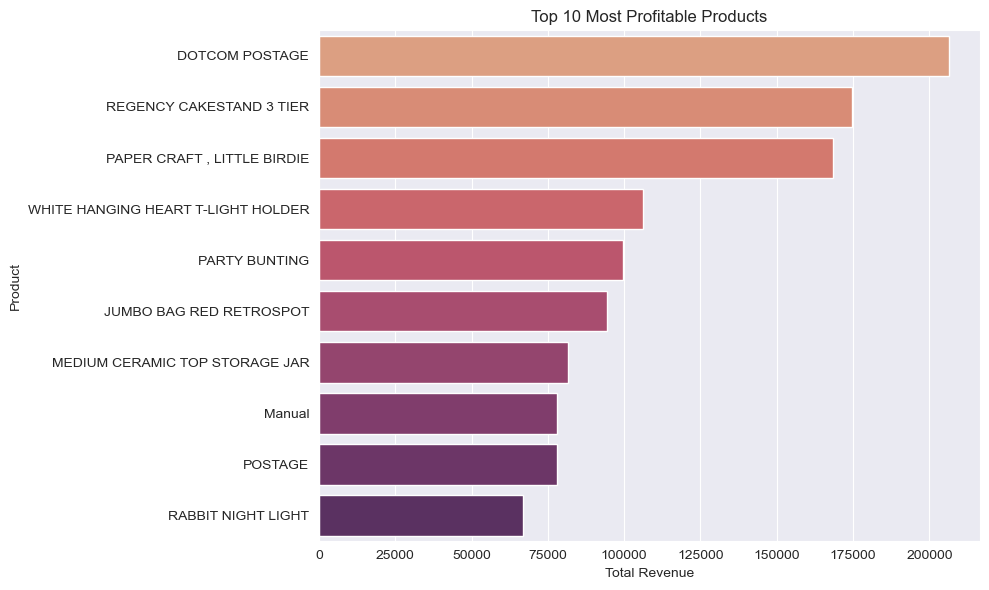

In [59]:
product_revenue=df_valid.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).reset_index()
top_profit=product_revenue.head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_profit,x='TotalPrice',y='Description',palette='flare',hue='Description',legend=False)
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

* Product Profit per order

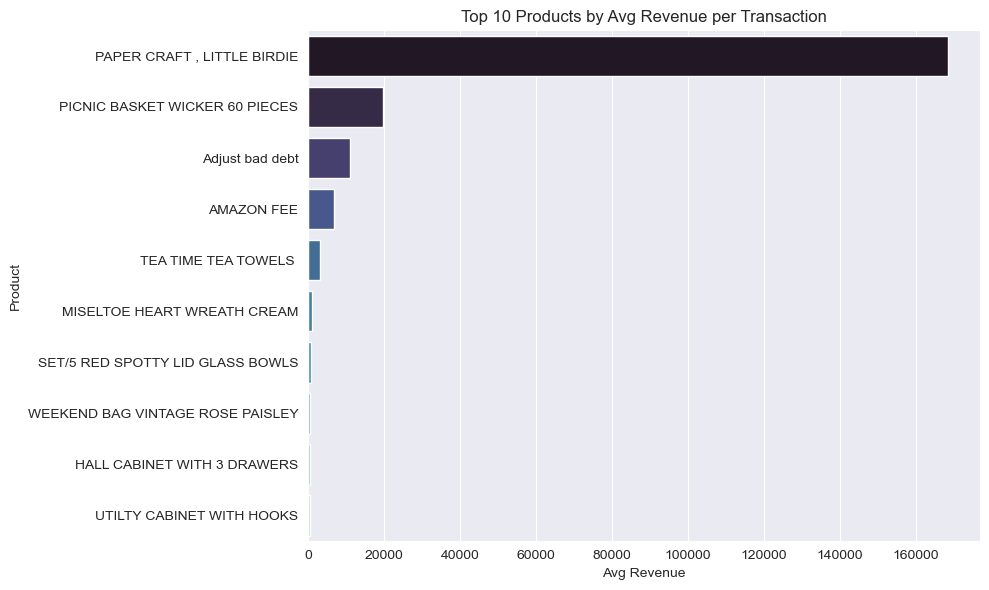

In [61]:
avg_revenue=df_valid.groupby('Description')['TotalPrice'].mean().sort_values(ascending=False).reset_index()
top_avg=avg_revenue.head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_avg, x='TotalPrice', y='Description', hue='Description', palette='mako', legend=False)

plt.title('Top 10 Products by Avg Revenue per Transaction')
plt.xlabel('Avg Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

* Quantity vs Profit Scatter Plot

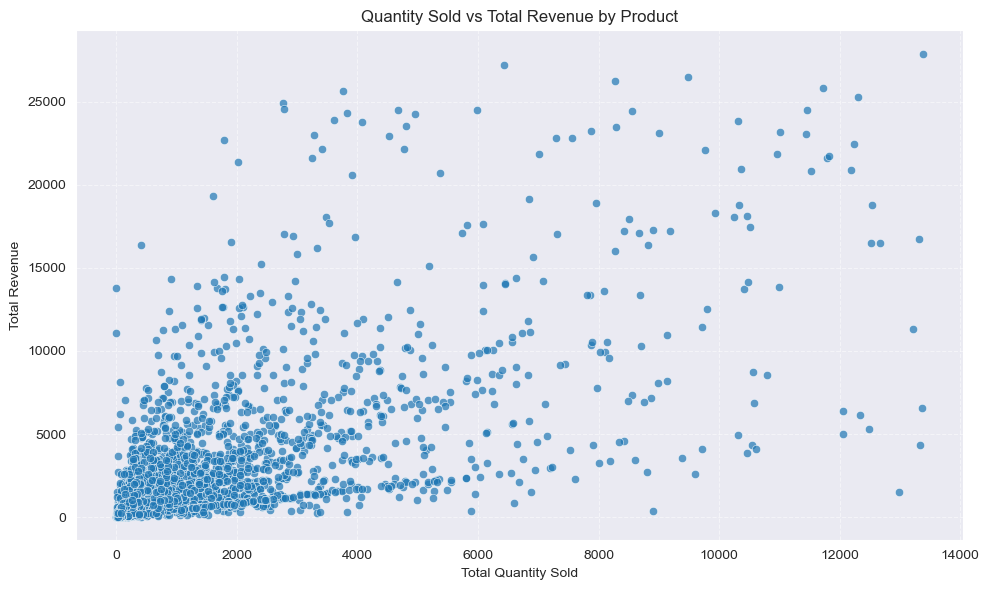

In [62]:
product_stats=df_valid.groupby('Description').agg({
    'TotalPrice': 'sum',
    'Quantity': 'sum'
}).reset_index()
quantity_cutoff = product_stats['Quantity'].quantile(0.99)
revenue_cutoff = product_stats['TotalPrice'].quantile(0.99)

# Filter the DataFrame to exclude extreme outliers
filtered_stats = product_stats[
    (product_stats['Quantity'] <= quantity_cutoff) &
    (product_stats['TotalPrice'] <= revenue_cutoff)
]

plt.figure(figsize=(10,6))
sns.scatterplot(data=filtered_stats,x='Quantity',y='TotalPrice',alpha=.7)
plt.title('Quantity Sold vs Total Revenue by Product')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 12. Correlation Analysis
Find how strongly numerical variables (like Quantity, UnitPrice, TotalPrice, etc.) are related to each other using correlation coefficients.

            Quantity  UnitPrice  TotalPrice
Quantity    1.000000  -0.003213    0.895895
UnitPrice  -0.003213   1.000000    0.158301
TotalPrice  0.895895   0.158301    1.000000


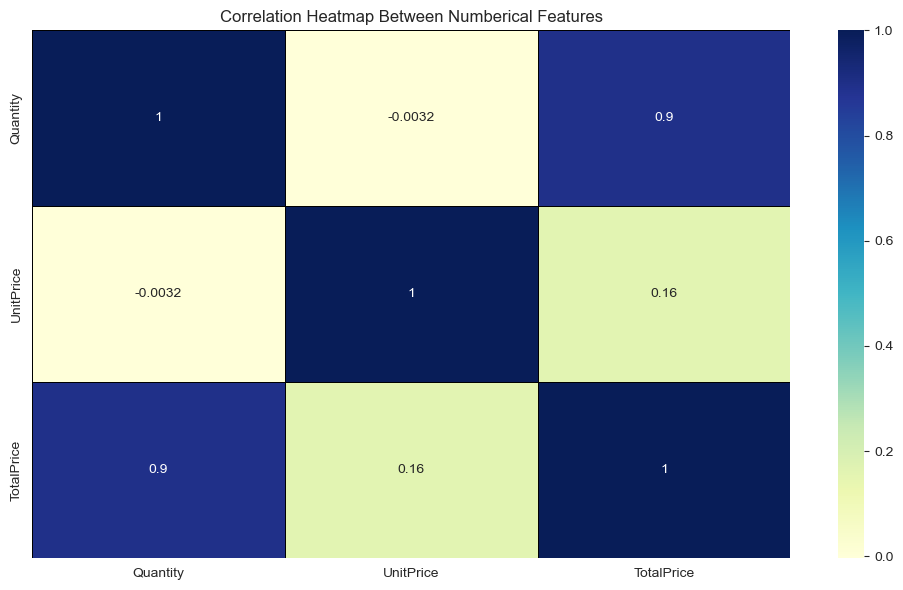

In [63]:
numeric_df=df[['Quantity','UnitPrice','TotalPrice']].copy()
numeric_df=numeric_df.dropna()
corr_matrix=numeric_df.corr()
print(corr_matrix)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True,linewidths=0.5,linecolor='black')
plt.title('Correlation Heatmap Between Numberical Features')
plt.tight_layout()
plt.show()

## 13. Basket Size & Average Spend Analysis
Calculating the number of items and total spend per invoice,


In [64]:
# preparing invoice level data
invoice_data=df_valid.groupby('InvoiceNo').agg({
    'TotalPrice': 'sum',
    'Quantity': 'sum'
}).reset_index()
invoice_data.columns=['InvoiceNo','BasketSize','InvoiceTotal']


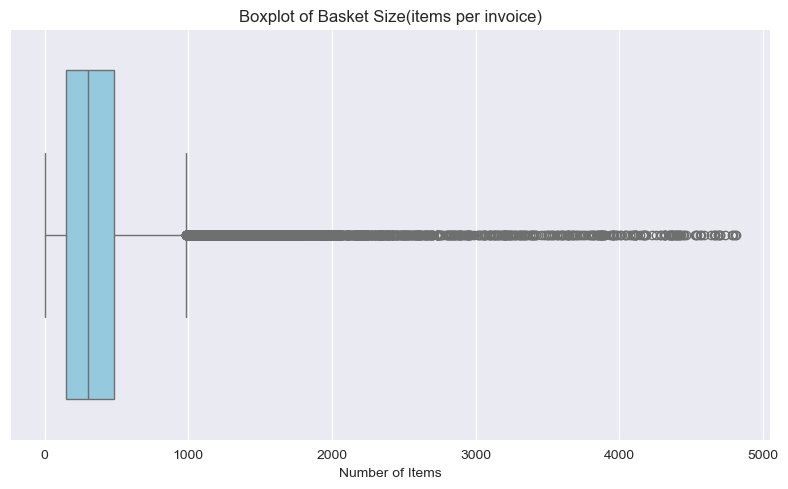

In [65]:
cutoff = invoice_data['BasketSize'].quantile(0.99)
filtered_invoice = invoice_data[invoice_data['BasketSize'] <= cutoff]


plt.figure(figsize=(8, 5))
sns.boxplot(x=filtered_invoice['BasketSize'], color='skyblue')
plt.title('Boxplot of Basket Size(items per invoice)')
plt.xlabel('Number of Items')
plt.tight_layout()
plt.show()

* Correlation between Basket Size & Spend

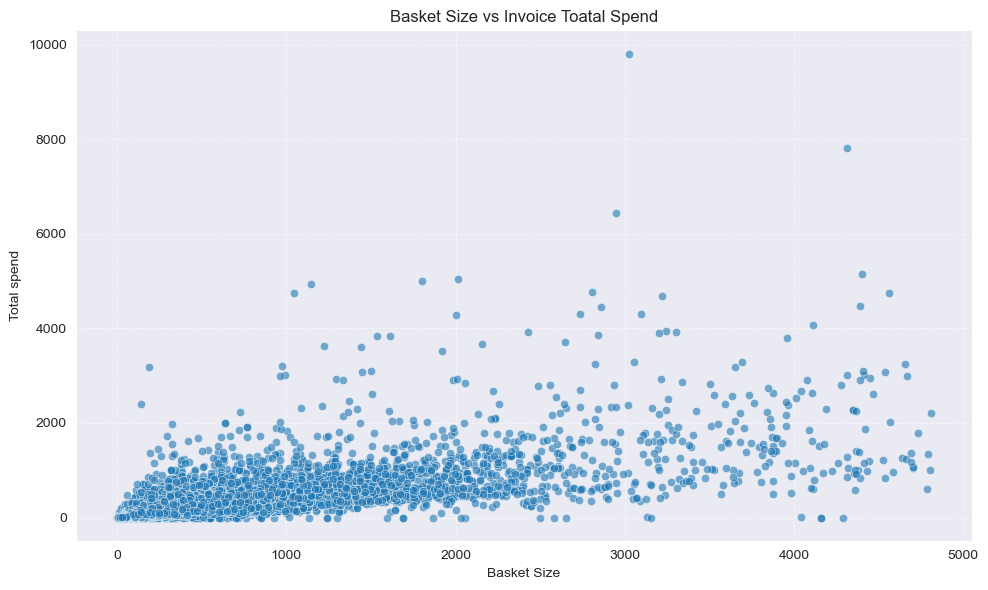

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=filtered_invoice, x='BasketSize',y='InvoiceTotal',alpha=0.6)
plt.title('Basket Size vs Invoice Toatal Spend')
plt.xlabel('Basket Size')
plt.ylabel('Total spend')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 14. Business Insights & Recommendations
Compile high-impact observations (from all your analyses) and provide strategic suggestions based on them.


In [67]:
from IPython.display import Markdown, display

summary = """
### 📌 Business Insights & Recommendations

- 🕒 **Peak purchase hours** are between 10 AM and 3 PM — consider flash sales during this time.
- 🌍 **United Kingdom** is the top-performing country — consider localized promotions for other countries to increase engagement.
- 🛒 **Average basket size** is low for most customers — introduce bundle discounts to increase volume per invoice.
- 📦 **Top 10 products** account for a large share of revenue — prioritize them in homepage visibility and stock planning.
- 🔁 **Returns are minimal** — which is positive, but consider tracking this continuously as data updates.
- 💸 **VIP customers contribute most revenue** — target them with loyalty programs or exclusive deals.
- 📈 **Strong correlation** between `Quantity` and `TotalPrice` confirms pricing model aligns with volume.
- 📊 Recommend building a **real-time dashboard** for weekly tracking of top-selling items, revenue per hour, and customer segmentation.

"""

display(Markdown(summary))



### 📌 Business Insights & Recommendations

- 🕒 **Peak purchase hours** are between 10 AM and 3 PM — consider flash sales during this time.
- 🌍 **United Kingdom** is the top-performing country — consider localized promotions for other countries to increase engagement.
- 🛒 **Average basket size** is low for most customers — introduce bundle discounts to increase volume per invoice.
- 📦 **Top 10 products** account for a large share of revenue — prioritize them in homepage visibility and stock planning.
- 🔁 **Returns are minimal** — which is positive, but consider tracking this continuously as data updates.
- 💸 **VIP customers contribute most revenue** — target them with loyalty programs or exclusive deals.
- 📈 **Strong correlation** between `Quantity` and `TotalPrice` confirms pricing model aligns with volume.
- 📊 Recommend building a **real-time dashboard** for weekly tracking of top-selling items, revenue per hour, and customer segmentation.



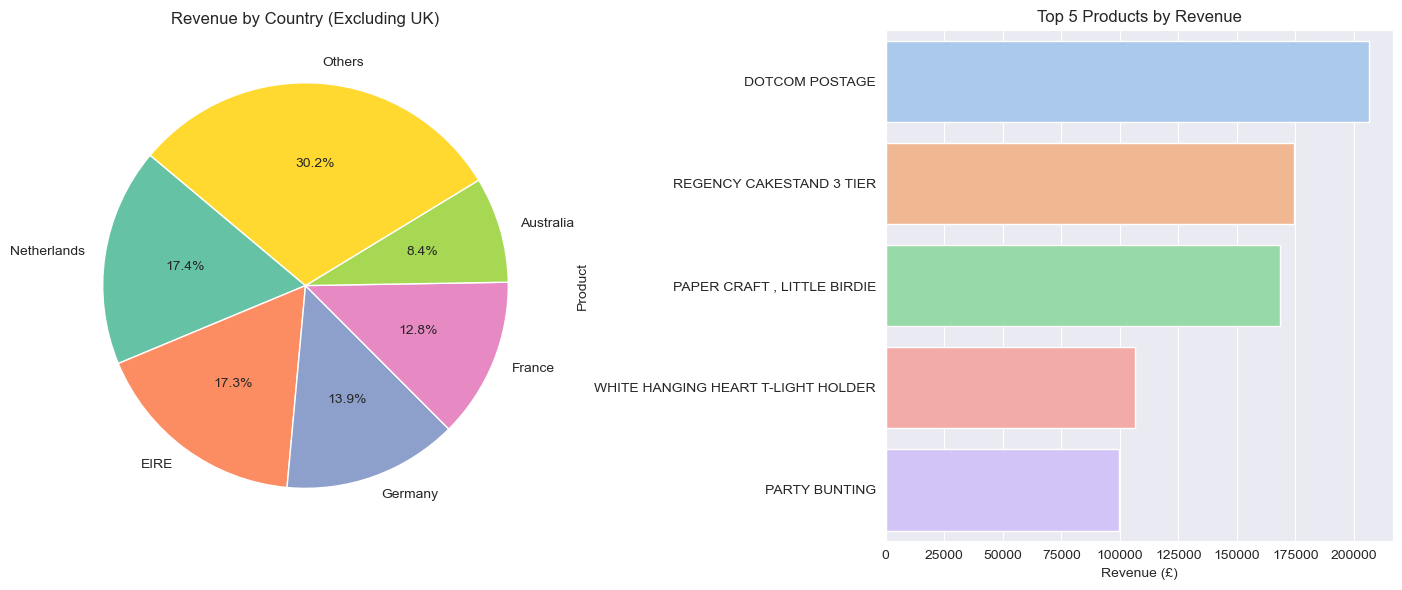

In [68]:
country_revenue = df[df['Country'] != 'United Kingdom'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

top5_countries = country_revenue.head(5)
others_sum = country_revenue[5:].sum()


pie_labels = list(top5_countries.index) + ['Others']
pie_sizes = list(top5_countries.values) + [others_sum]


top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(5).reset_index()


fig, axes = plt.subplots(1, 2, figsize=(14, 6))


axes[0].pie(
    pie_sizes, labels=pie_labels, autopct='%1.1f%%', startangle=140,
    colors=sns.color_palette("Set2")
)
axes[0].set_title('Revenue by Country (Excluding UK)')


sns.barplot(x='TotalPrice', y='Description',hue='Description', data=top_products, ax=axes[1], palette='pastel',legend=False)
axes[1].set_title('Top 5 Products by Revenue')
axes[1].set_xlabel('Revenue (£)')
axes[1].set_ylabel('Product')

plt.tight_layout()
plt.show()
